In [25]:
import plotly.figure_factory as ff
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

In [26]:
import pandas as pd

def import_data():
    sample_data_UNC = 'C:/Users/PKchu/Desktop/UHD/SPRING 2021/Senior Project/Soibam/hmec.csv'
    sample_data_list = pd.read_csv(sample_data_UNC)
    
    feature_rows = sample_data_list.Boundary
    sample_data_list.pop("Boundary") #get rid of boundary labels/col
    
    sample_data = np.array(sample_data_list, dtype = object) #convert data types to objects for manipulation
    
    feature_rows = np.array(feature_rows, dtype = object)
    feature_columns = np.array(['CTCF', 'DNase', 'H2A', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K79me2', 'H3K9ac', 'H3K9me3', 'H4K20me1'], dtype = object)

    
    return sample_data, feature_rows, feature_columns, sample_data_list #data[0] = numpy.ndarray, data[3] = pandas df

In [28]:
data = import_data()

# Stat Data

In [29]:
data_pts = data[3] #df object for .describe()

#data = np.array(data, dtype=np.float32)
#col_names = np.dtype(data[2].names)
#labels = col_names.dtype(col_names)

statData = data_pts


statData.describe(percentiles=None,
                  include = 'all'
                 )

CTCF        DNase          H2A      H3K27ac     H3K27me3  \
count  7134.000000  7134.000000  7134.000000  7134.000000  7134.000000   
mean    239.653346   238.898416   156.700402   163.256116   136.088876   
std     143.185097   141.771726   104.091775   180.831485    88.020375   
min      19.150000    20.390000     4.570000     3.850000     8.030000   
25%     120.812500   147.235000    80.742500    65.892500    76.042500   
50%     206.920000   197.540000   124.985000    93.525000   106.500000   
75%     319.005000   283.530000   209.850000   182.080000   177.920000   
max    1196.810000  1978.550000  1049.060000  2888.460000  1366.330000   

          H3K36me3      H3K4me1      H3K4me2      H3K4me3     H3K79me2  \
count  7134.000000  7134.000000  7134.000000  7134.000000  7134.000000   
mean    202.862989   143.461187   187.984256   207.990213   185.992069   
std     152.300177   100.965027   193.064590   260.916927   294.706873   
min       4.720000     4.420000     4.220000     6.700000     0.000000   
25%      93.190000    73.742500    69.110000    78.432500    29.990000   
50%     130.120000   113.745000   100.090000    90.860000    48.990000   
75%     280.507500   179.197500   238.315000   154.695000   205.505000   
max    1039.200000  1284.420000  2240.200000  2538.100000  2630.760000   

            H3K9ac      H3K9me3     H4K20me1  
count  7134.000000  7134.000000  7134.000000  
mean    180.123862    98.168468   149.677515  
std     149.403463    44.677360    43.583836  
min       8.570000     6.240000    16.750000  
25%     105.380000    73.350000   123.500000  
50%     124.170000    88.235000   145.050000  
75%     176.007500   109.532500   168.240000  
max    2453.440000   778.300000   583.300000

# Cophenetic Correlation Coefficient

In [30]:
#from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z_linkage_Matrix = linkage(data_pts, 'average', metric='euclidean')
c, coph_dists = cophenet(Z_linkage_Matrix, pdist(data_pts))
c

0.8785320535568286

In [31]:
Z_linkage_Matrix = linkage(data_pts, 'average', metric='cosine') #create linkage matrix for cpcc
c, coph_dists = cophenet(Z_linkage_Matrix, pdist(data_pts))
c

0.5484441968536227

# Slice Distance

In [32]:
#data_pts = data_pts.transpose() #basically... matrix of "cols" ((13)rows:(9000)cols)
#euclidean_slice_distance = 1000
cosine_slice_distance = 0.25

# Cluster Data

In [33]:
from scipy.cluster.hierarchy import fcluster

#euclidean distance = 1055 - 7 clusters
#cosine_slice_distance = 0.26
###distance :
###Forms flat clusters so that the original observations in each flat cluster have no greater a cophenetic distance than t.
clusters = fcluster(Z_linkage_Matrix, cosine_slice_distance, criterion='distance')
###inconsistent :
###inconsistent: If a cluster node and all its descendants have an inconsistent value less than or equal to t, then all its leaf descendants belong to the same flat cluster. 
###When no non-singleton cluster meets this criterion, every node is assigned to its own cluster. (Default)
###inconsistency = (cluster_height - average) / standard_deviation
#clusters = fcluster(Z_linkage_Matrix, 3, depth = 100)

#print(clusters, sep='\n')
max_clusters = max(clusters)

print("Range = 1 -> n. Max clusters: ", max_clusters, "\n")
print(len(clusters), "cluster labels \n")
print(", ".join(str(x) for x in clusters))

Range = 1 -> n. Max clusters:  5 

7134 cluster labels 

2, 5, 5, 3, 3, 3, 3, 3, 2, 4, 5, 3, 5, 2, 4, 2, 5, 2, 3, 3, 3, 5, 2, 3, 3, 3, 3, 4, 2, 3, 2, 3, 2, 2, 4, 3, 3, 3, 3, 3, 5, 5, 3, 3, 5, 3, 3, 5, 3, 4, 4, 5, 3, 3, 3, 3, 3, 5, 3, 2, 3, 3, 3, 3, 2, 3, 3, 5, 3, 2, 5, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 5, 3, 5, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 5, 2, 2, 5, 2, 3, 4, 2, 4, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 5, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 5, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 5, 3, 3, 3, 3, 5, 5, 4, 5, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 5, 3, 3, 5, 5, 3, 3, 3, 2, 2, 3, 4, 3, 3, 2, 4, 3, 3, 3, 5, 3, 5, 2, 3, 5, 2, 3, 5, 3, 3, 2, 5, 3, 3, 3, 3, 3, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 5, 5, 3, 3, 2, 3, 5, 2, 2, 2, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 2, 5, 3, 3, 5, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 5, 4, 3, 2, 2, 5, 3, 3, 3, 2, 3, 3, 3, 4, 2, 2, 5, 3, 5, 3, 2, 3, 4, 3, 4, 3, 3, 5, 2, 3, 3, 2, 5, 2, 3, 3, 5, 2, 3, 3, 3, 3, 3, 3, 2, 5, 2, 3, 3, 3, 3, 2, 3, 5, 3, 3

# Create Dendrogram

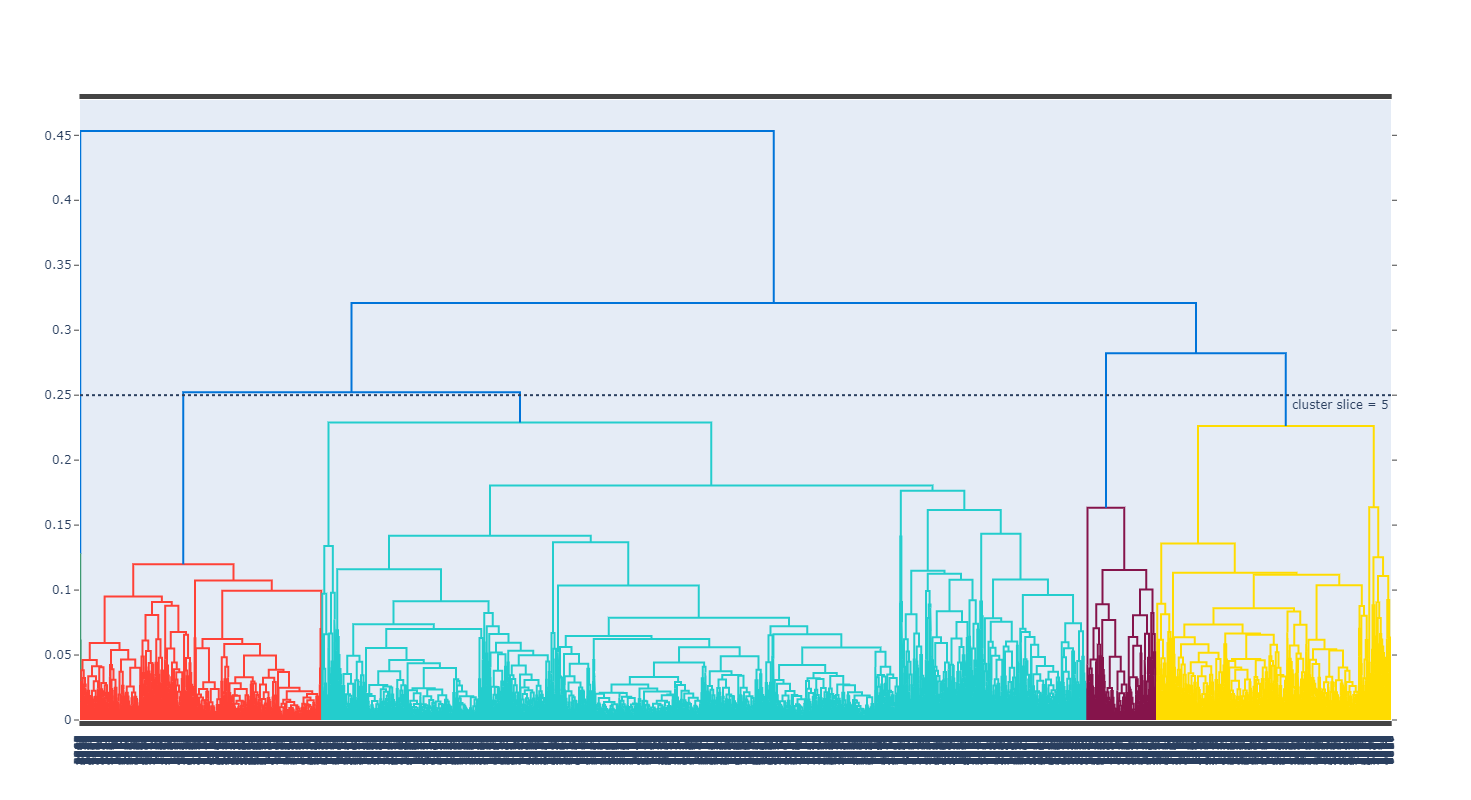

In [34]:
dendro_plt = ff.create_dendrogram(data[0], 
                           #orientation='left',
                           linkagefun=lambda x: linkage(data_pts, 'average', metric='cosine'),
                           #distfun='euclidean', 
                           color_threshold=cosine_slice_distance)
dendro_plt.add_hline(y = cosine_slice_distance, line_dash = "dot", annotation_text = (f"cluster slice = {max_clusters}"), annotation_position = "bottom right")
#dendro_plt.add_hline(y = 0.23, line_dash = "dot", annotation_text = "cluster slice", annotation_position = "bottom right")
#dendro_plt.add_hline(y = 460, line_dash = "dot", annotation_text = "c.s. = 8", annotation_position = "bottom right")
#dendro_plt.add_hline(y = 425, line_dash = "dot", annotation_text = "c.s = 10", annotation_position = "bottom right")
#dendro_plt.add_hline(y = (3054*0.255), line_dash = "dot", annotation_text = "c.s = 7", annotation_position = "bottom right")
dendro_plt.update_layout(width=1500, height=800)
dendro_plt.show()

# KMeans Elbow Plot

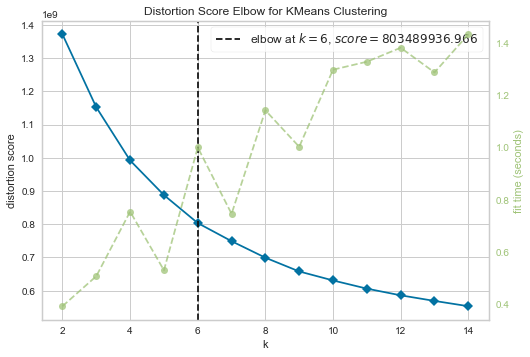

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# Elbow Method for K means
# Import ElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15), metric = 'distortion', timings= True)
visualizer.fit(data_pts)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

# KMeans Silhouette

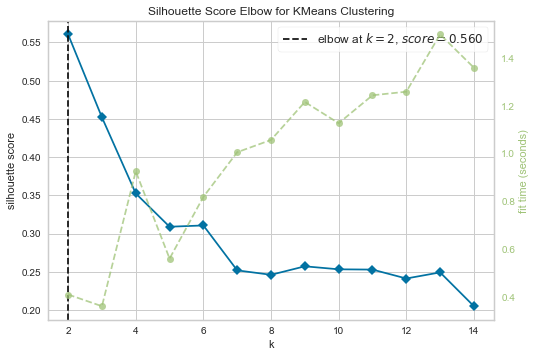

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [11]:
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15), metric = 'silhouette', timings= True)
visualizer.fit(data_pts)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

# Silhouette Visualization

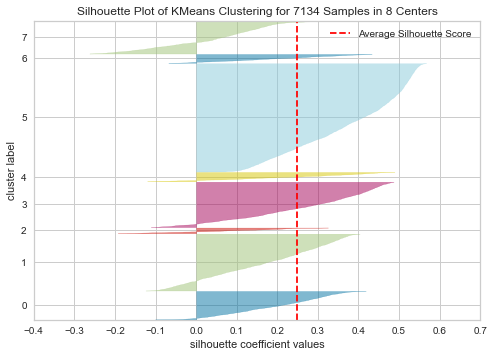

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 7134 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data_pts)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=15)
    cluster_labels = clusterer.fit_predict(data_pts)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(data_pts, cluster_labels)
    print(n_clusters," clusters - "
          "Average silhouette score:", silhouette_avg)

2  clusters - Average silhouette score: 0.5604306435003054
3  clusters - Average silhouette score: 0.4519633239017473
4  clusters - Average silhouette score: 0.35242105396055057
5  clusters - Average silhouette score: 0.3039000006041514
6  clusters - Average silhouette score: 0.30998455236624717
7  clusters - Average silhouette score: 0.25037431296699286
8  clusters - Average silhouette score: 0.24776052127274692


# Unordered Heatmap

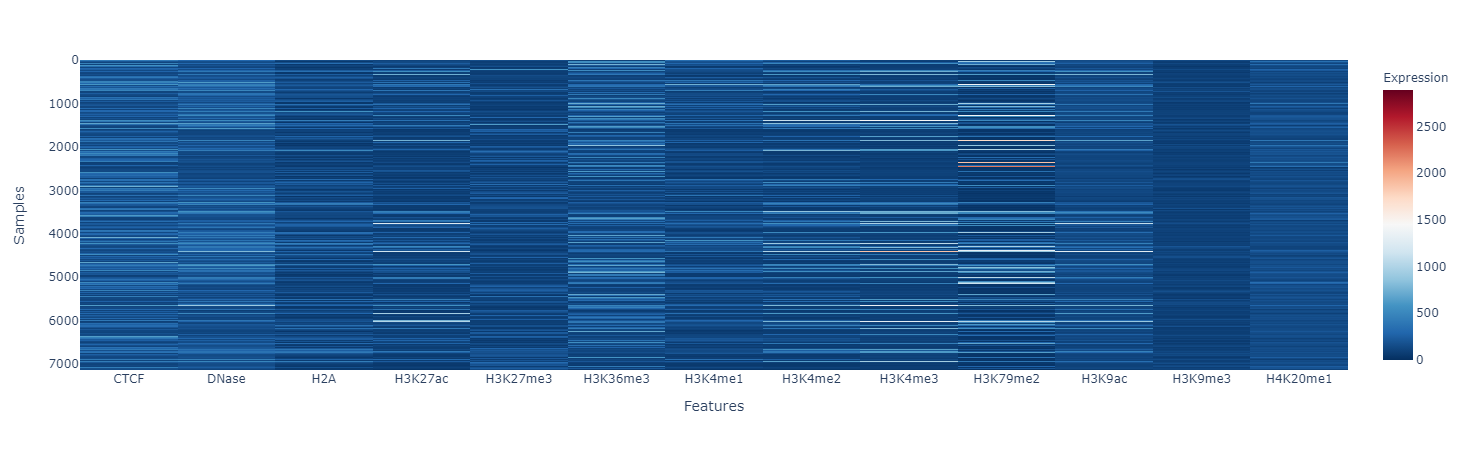

In [14]:
import plotly.express as px
from sklearn.preprocessing import normalize

dataL = data[2].tolist()
xList = dataL

#normalize data (fits cosine)
#normalize([xList], norm="l1")


uo_hm_fig = px.imshow(data[0],
                labels=dict(x="Features", y="Samples", color="Expression"),
                #template = 'plotly',
                color_continuous_scale='RdBu_r', #RdBu,
                x=xList 
                #y=]
               )

uo_hm_fig.show()

# Ordered Clustermap

In [15]:
import pandas as pd
import seaborn as sns

import scipy
from scipy.spatial import distance
from scipy.cluster import hierarchy

dataL = data[0].tolist()

C:\Users\PKchu\Anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



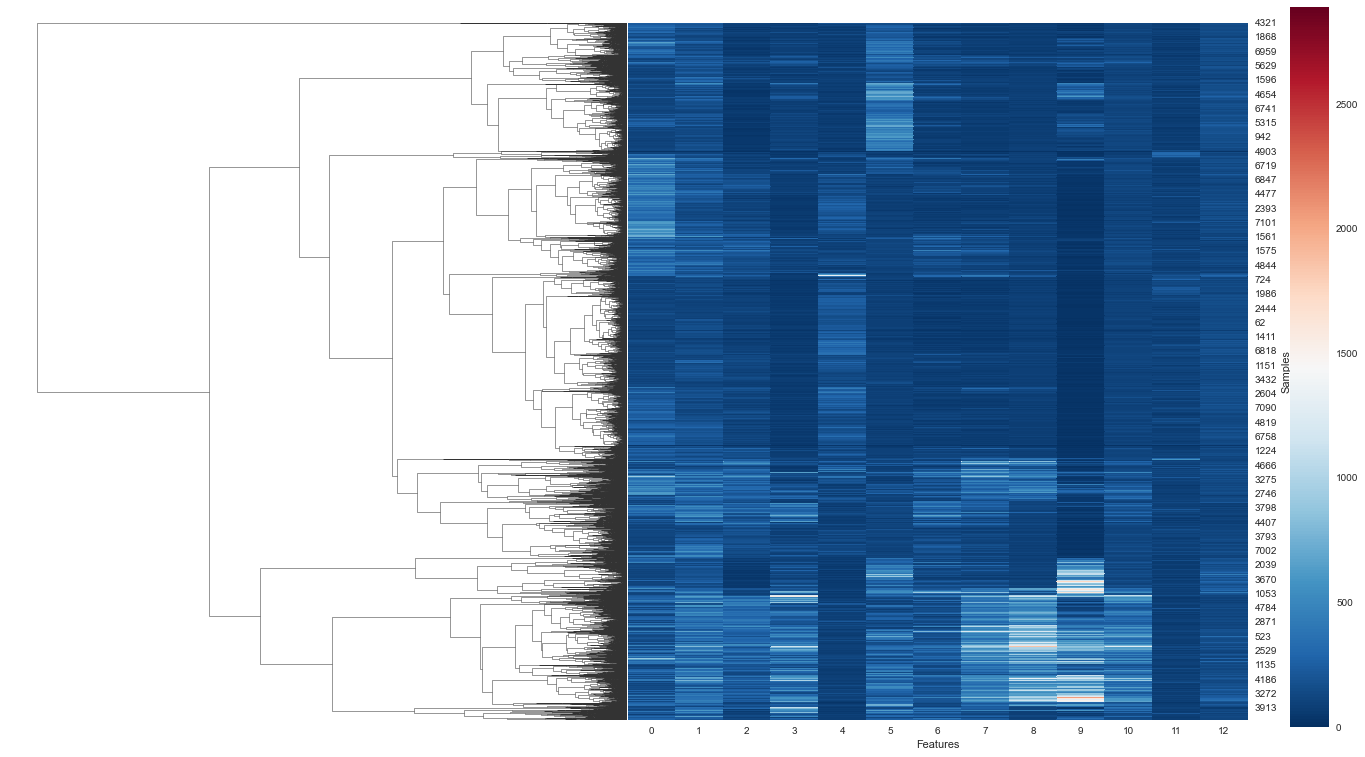

In [16]:
#sns.clustermap(labeled.sort_values('labels').iloc[:,0:-1], z_score=0)
sample_cluster_map = sns.clustermap(dataL, cmap = 'RdBu_r', #plasma, RdBu
                                   figsize=(18, 20), #linewidths = 0.001,
                                   metric = 'cosine', row_cluster = True,
                                    col_cluster=False,
                                   #row_colors = row_colors,
                                   dendrogram_ratio=(.5, .5),
                                   cbar_pos=(1, 0.015, .03, .5),
                                   #z_score=1 standardize z-score - 0(rows) 1(cols)
                                    #subtract the minimum and divide each by its maximum
                                   )
#‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’,‘euclidean’, ‘hamming’, ‘jaccard’,‘kulsinski’, ....
sample_cluster_map.ax_heatmap.set_xlabel('Features')
sample_cluster_map.ax_heatmap.set_ylabel('Samples')
sample_cluster_map.ax_col_dendrogram.remove()

#plt.savefig(out_pdf)
###   access linkage matricies for rows/columns   ###
#clustmap = sns.clustermap(df, metric="correlation")
#clustmap.dendrogram_col.linkage # linkage matrix for columns
#clustmap.dendrogram_row.linkage # linkage matrix for rows


# Dendrogram + Correlation Map

In [17]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

import numpy as np
from scipy.spatial.distance import pdist, squareform


# get data
data = np.genfromtxt('C:/Users/PKchu/Desktop/UHD/SPRING 2021/Senior Project/Soibam/hmec.csv',
                     names=True,usecols=tuple(range(0,13)),dtype=float, delimiter=",")

#dendro_plt = ff.create_dendrogram(data_pts, 
#                           #orientation='left',
#                           linkagefun=lambda x: linkage(data_pts, 'average', metric='euclidean'),
#                           #distfun='euclidean', 
#                           color_threshold=200)
#dendro_plt.update_layout(width=1000, height=800)
#dendro_plt.show()

In [18]:
data_array = data.view((np.float, len(data.dtype.names)))

data_array

array([[119.54, 141.78,  40.85, ...,  81.11, 138.46, 203.75],
       [207.78, 434.15, 242.3 , ..., 307.63,  69.26, 274.42],
       [404.23, 326.56, 260.99, ..., 298.86,  92.27, 192.7 ],
       ...,
       [ 94.72, 248.53,  68.18, ..., 132.27, 280.14, 148.33],
       [178.56, 157.63,  86.28, ..., 117.16, 364.89, 166.36],
       [217.56, 247.15, 112.9 , ..., 143.01, 307.3 , 113.36]])

In [19]:
data_array = data_array.transpose()

#data_array.shape
data_array

array([[119.54, 207.78, 404.23, ...,  94.72, 178.56, 217.56],
       [141.78, 434.15, 326.56, ..., 248.53, 157.63, 247.15],
       [ 40.85, 242.3 , 260.99, ...,  68.18,  86.28, 112.9 ],
       ...,
       [ 81.11, 307.63, 298.86, ..., 132.27, 117.16, 143.01],
       [138.46,  69.26,  92.27, ..., 280.14, 364.89, 307.3 ],
       [203.75, 274.42, 192.7 , ..., 148.33, 166.36, 113.36]])

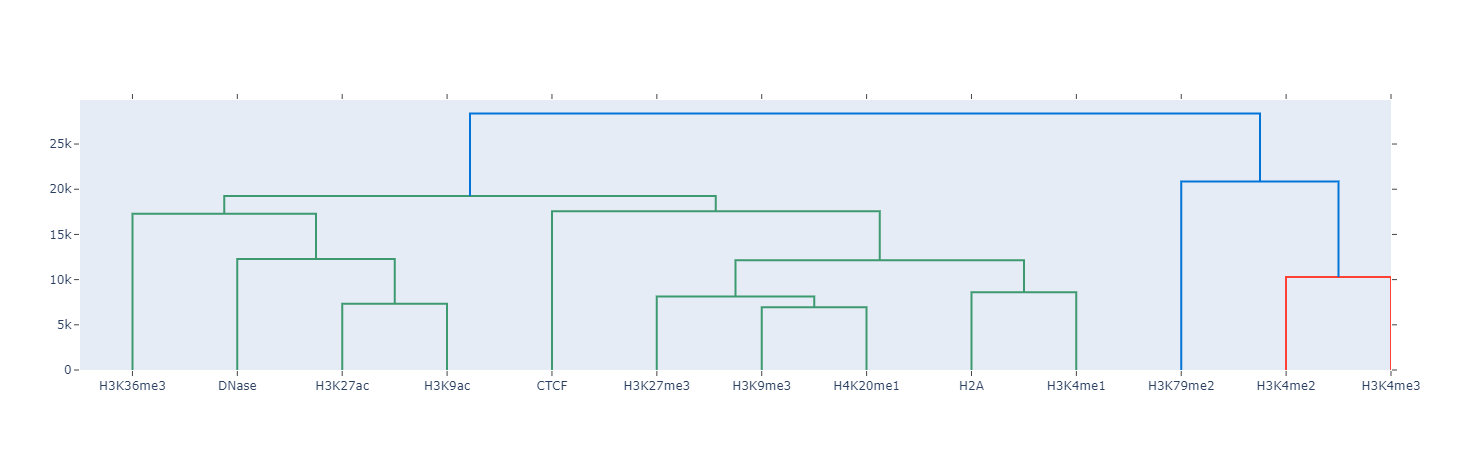

In [20]:
labels = data.dtype.names

# Initialize figure by creating upper dendrogram
dendro_plt = ff.create_dendrogram(data_array, orientation='bottom', labels=labels)

dendro_plt.show()

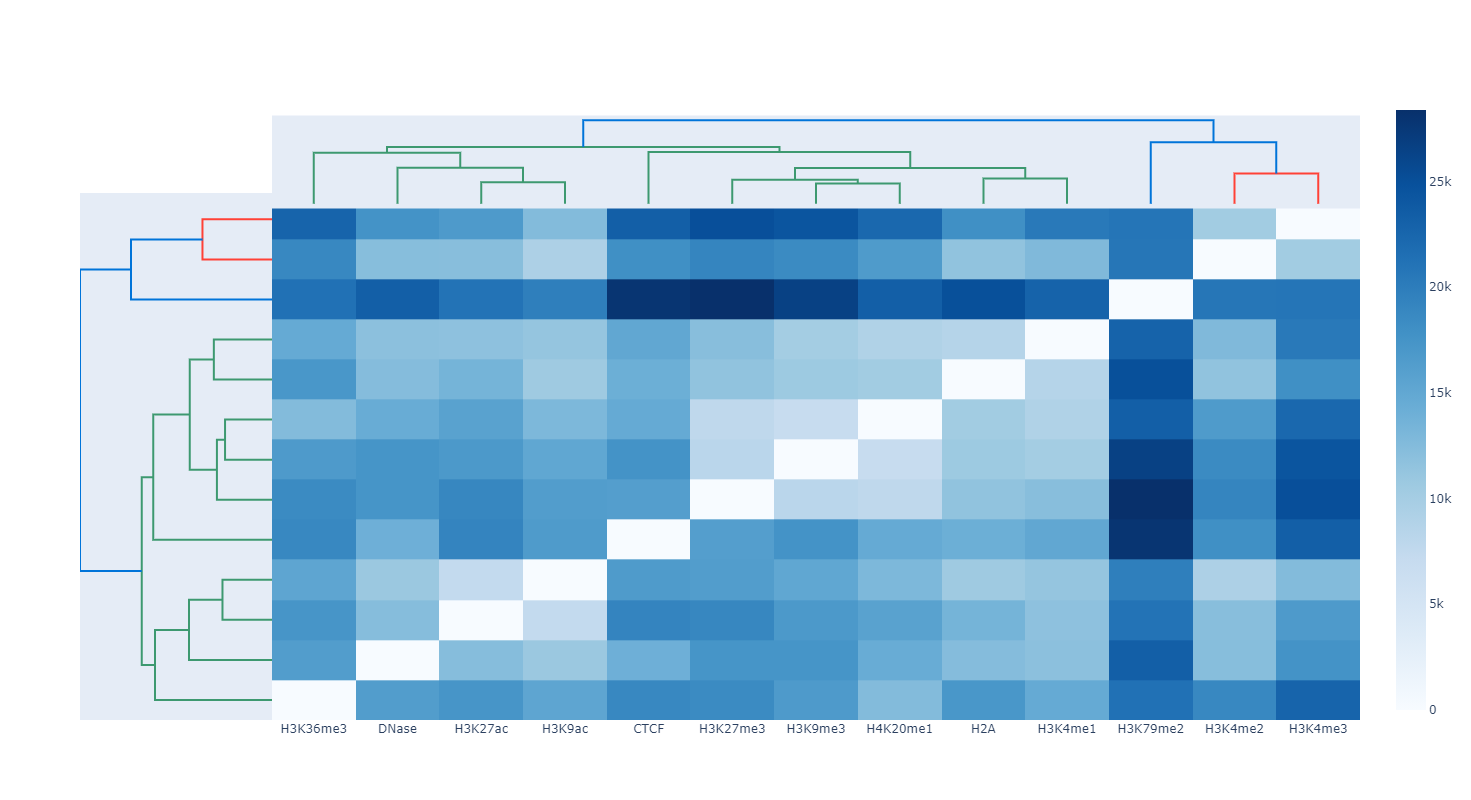

In [21]:

for i in range(len(dendro_plt['data'])):
    dendro_plt['data'][i]['yaxis'] = 'y2'

# Create Side Dendrogram
dendro_side = ff.create_dendrogram(data_array, orientation='right')
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'

# Add Side Dendrogram Data to Figure
for data in dendro_side['data']:
    dendro_plt.add_trace(data)

# Create Heatmap
dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves = list(map(int, dendro_leaves))
data_dist = pdist(data_array)
heat_data = squareform(data_dist)
heat_data = heat_data[dendro_leaves,:]
heat_data = heat_data[:,dendro_leaves]

heatmap = [
    go.Heatmap(
        x = dendro_leaves,
        y = dendro_leaves,
        z = heat_data,
        colorscale = 'Blues'
    )
]

heatmap[0]['x'] = dendro_plt['layout']['xaxis']['tickvals']
heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']

# Add Heatmap Data to Figure
for data in heatmap:
    dendro_plt.add_trace(data)

# Edit Layout
dendro_plt.update_layout({'width':800, 'height':800,
                         'showlegend':False, 'hovermode': 'closest',
                         })
# Edit xaxis
dendro_plt.update_layout(xaxis={'domain': [.15, 1],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'ticks':""})
# Edit xaxis2
dendro_plt.update_layout(xaxis2={'domain': [0, .15],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

# Edit yaxis
dendro_plt.update_layout(yaxis={'domain': [0, .85],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'showticklabels': False,
                                  'ticks': ""
                        })
# Edit yaxis2
dendro_plt.update_layout(yaxis2={'domain':[.825, .975],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

# Plot!
dendro_plt.show()